## Objective: To predict if a passenger survived or not, among the members in test dataset.
##### Flow for start to end of project:
    1.Variable Identification
    2.Univariate/Bivariate Analysis
    3.Outlier Treatment
    4.Missing Value Treatment
    5.Feature Engineering
    6.Creating a Model

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [49]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('train.csv')

In [50]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [51]:
#studying about data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1. Variable Identification

In [52]:
#checking presence of training data in each feature
total = train_data.isnull().sum()
percent = train_data.isnull().sum()/train_data.isnull().count()*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'null %'])
missing_data. sort_values(by=['Total'], ascending=False)

,Total,null %
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [53]:
#checking presence of testing data in each feature
total = test_data.isnull().sum()
percent = test_data.isnull().sum()/test_data.isnull().count()*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'null %'])
missing_data. sort_values(by=['Total'], ascending=False)

,Total,null %
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


### Categorizing data

In [54]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


##### Category type data = Sex, Ticket, Cabin, Embarked, also Pclass, Survived
##### Numeric data = Age, SibSp, Parch, Fare
##### Mixed data = Name, Cabin

## 2. Bivariate and univariate analysis

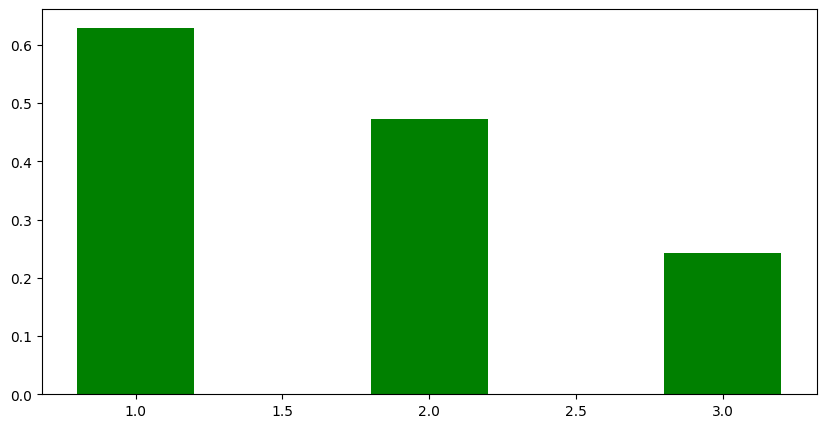

In [55]:
analysis_passenger_class=train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
x_axes = list(analysis_passenger_class.Pclass)
y_axes = list(analysis_passenger_class.Survived)

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axes, y_axes, color ='green',
        width = 0.4)
plt.show()

Insight: Passengers of better first class is higher than second class which is higher than thord class.


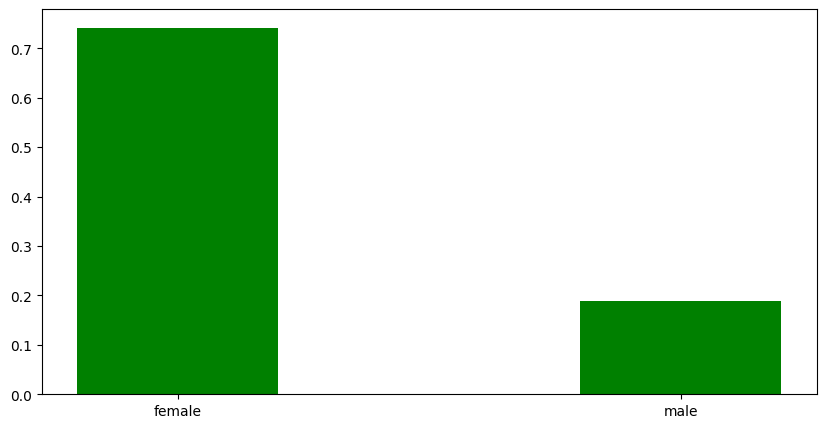

In [56]:
analysis_sex=train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
x_axes = list(analysis_sex.Sex)
y_axes = list(analysis_sex.Survived)

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axes, y_axes, color ='green',
        width = 0.4)
plt.show()

Insight: Female passenger survived more than male passengers.

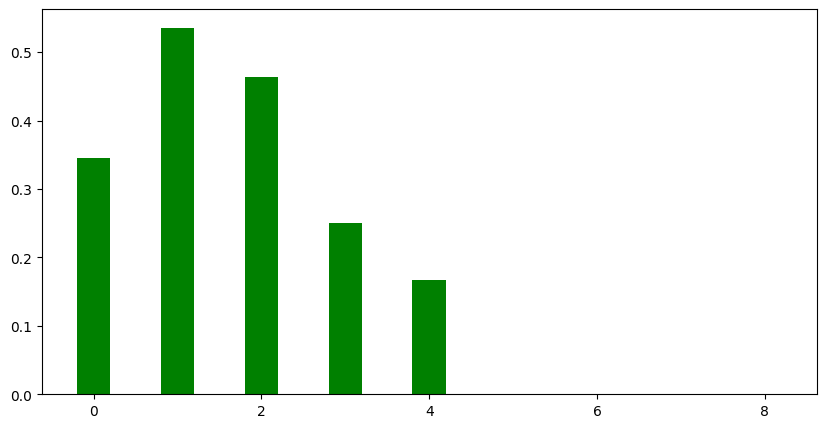

In [57]:
analysis_SibSp=train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
x_axes = list(analysis_SibSp.SibSp)
y_axes = list(analysis_SibSp.Survived)

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axes, y_axes, color ='green',
        width = 0.4)
plt.show()

Insight: Passengers with family survived more.

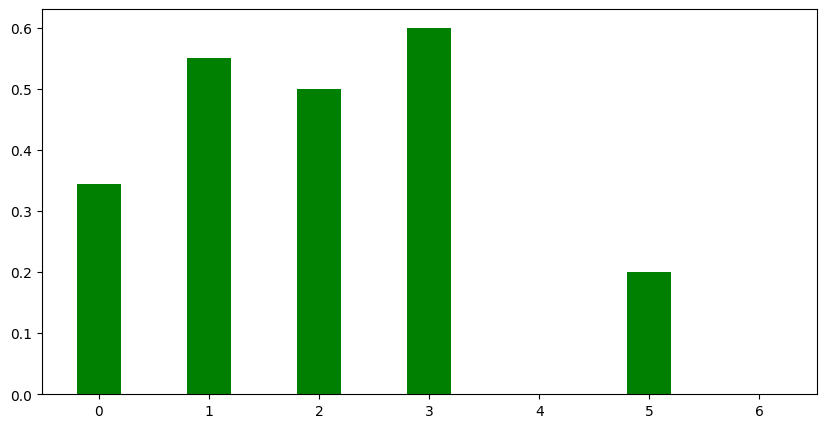

In [58]:
analysis_Parch=train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
x_axes = list(analysis_Parch.Parch)
y_axes = list(analysis_Parch.Survived)

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axes, y_axes, color ='green',
        width = 0.4)
plt.show()

Insight: Passengers with family survived more.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

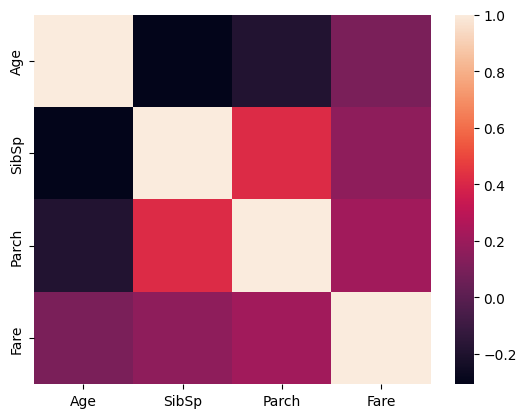

In [59]:
# study for numeric data correlation
print(train_data[['Age','SibSp','Parch','Fare']].corr())
sns.heatmap(train_data[['Age','SibSp','Parch','Fare']].corr())

Inference: No strong correlation between numeric data

## 3. Feature Engineering

In [60]:
#training and testing data, both have significant number of null values in Cabin feature.
#So we'll drop it, as it may lead to significant variance while inferring insights.

train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_data, test_data]
print(train_data.shape)

(891, 10)


In [61]:
# extracting titles to fill ages with reference to their derived titles.
# e,g miss and master younger than 18, mr. and mrs. older than 18.
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data['Title'], train_data['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [62]:
# handling few other exceptions noted and setting designations to adults.
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Adult')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Adult,3,20
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0


In [63]:
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (891, 10))

Convering nominal to ordinal

In [64]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0})
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr


In [65]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [66]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [67]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
#             we get all values excluding NaN
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
# Finding median
            age_guess = guess_df.median()

            # Just round off with  ceil function
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
#     Now we have found the median for 6 permutation between pclass and Sex
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0




Convert continuous feature to ordinal


In [68]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data.pivot_table(values='Pclass', index=['AgeBand'], columns='Survived', aggfunc='count')

Survived,0,1
AgeBand,,
"(-0.08, 16.0]",45,55
"(16.0, 32.0]",328,167
"(32.0, 48.0]",127,89
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


In [69]:
# categorizing data into age-size of 16 years
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']=4
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"
5,0,3,0,1,0,0,8.4583,Q,1.0,"(16.0, 32.0]"
6,0,1,0,3,0,0,51.8625,S,1.0,"(48.0, 64.0]"
7,0,3,0,0,3,1,21.0750,S,4.0,"(-0.08, 16.0]"
8,1,3,1,1,0,2,11.1333,S,3.0,"(16.0, 32.0]"
9,1,2,1,0,1,0,30.0708,C,3.0,"(-0.08, 16.0]"


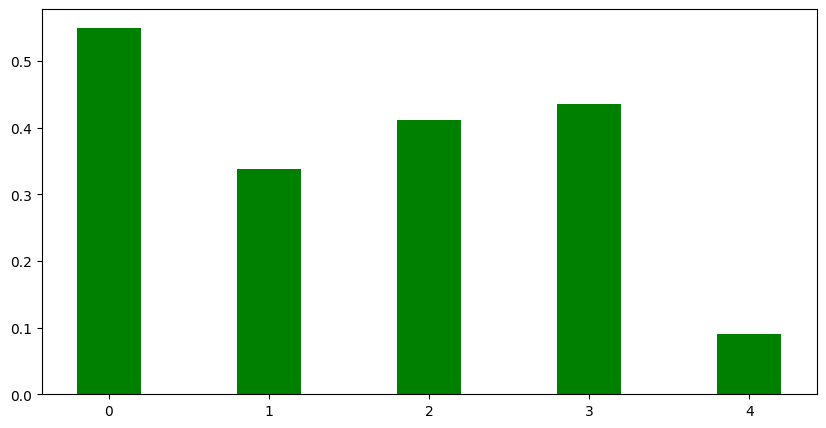

In [70]:
analysis_AgeBand=train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)
x_axes = list(analysis_AgeBand.Age)
y_axes = list(analysis_AgeBand.Survived)

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axes, y_axes, color ='green',
        width = 0.4)
plt.show()

Insight: Infants and children were saved most comparatively to the senior citizens.

In [71]:
#After Classifying, dropping AgeBand from training data
train_data = train_data.drop(['AgeBand'], axis=1)
combine = [train_data, test_data]

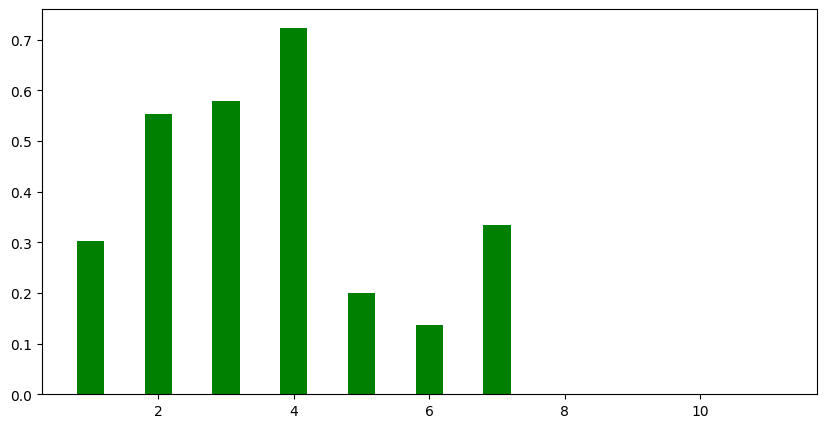

In [72]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

analysis_FamilySize=train_data[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
x_axes = list(analysis_FamilySize.FamilySize)
y_axes = list(analysis_FamilySize.Survived)

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axes, y_axes, color ='green',
        width = 0.4)
plt.show()

Insight: Passenger with 2-4 family members survived more.

In [73]:
# Dropping redundant variables
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_data, test_data]

## 4. Missing value treatment

Filling embarked with mode


In [74]:
freq_port = train_data.Embarked.mode()
print(freq_port)
freq_port = train_data.Embarked.mode()[0]
print(freq_port)

0    S
Name: Embarked, dtype: object
S


In [75]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [76]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,0,1,7.2500,0,1.0
1,1,1,1,2,71.2833,1,3.0
2,1,3,1,1,7.9250,0,2.0
3,1,1,1,2,53.1000,0,3.0
4,0,3,0,2,8.0500,0,1.0


In [77]:
# filling median fare in test data for missing values
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

Converting continous to ordinal

In [78]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data.pivot_table(values='Pclass', index=['FareBand'], columns='Survived', aggfunc='count')

Survived,0,1
FareBand,,
"(-0.001, 7.91]",179,44
"(7.91, 14.454]",156,68
"(14.454, 31.0]",121,101
"(31.0, 512.329]",93,129


In [79]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FareBand
0,0,3,0,1,7.2500,0,1.0,"(-0.001, 7.91]"
1,1,1,1,2,71.2833,1,3.0,"(31.0, 512.329]"
2,1,3,1,1,7.9250,0,2.0,"(7.91, 14.454]"
3,1,1,1,2,53.1000,0,3.0,"(31.0, 512.329]"
4,0,3,0,2,8.0500,0,1.0,"(7.91, 14.454]"


In [80]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]

train_data.head()



,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,0,1,0,0,1.0
1,1,1,1,2,3,1,3.0
2,1,3,1,1,1,0,2.0
3,1,1,1,2,3,0,3.0
4,0,3,0,2,1,0,1.0


In [87]:
X = train_data.drop("Survived", axis=1)
Y = train_data["Survived"]
X_test_submission  = test_data.drop(["PassengerId","Survived"], axis=1).copy()

In [88]:
test_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,1,0,3,0,1,0,0,1.0
1,2,1,1,1,2,3,1,3.0
2,3,1,3,1,1,1,0,2.0
3,4,1,1,1,2,3,0,3.0
4,5,0,3,0,2,1,0,1.0



### Choose your algorithm

We can't say the best model in general for classification or regression.

Best model can be found only through trial and error.

Here we will see only one model.

Procedures:

1. Create
2. Fit
3. Predict



In [89]:
from sklearn.model_selection import train_test_split

In [94]:
from sklearn.metrics import accuracy_score

In [127]:
train_accuracy=[]
test_accuracy=[]
sizes=[]
for size in np.arange(0.1,1.0,0.05):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=42)
  sizes.append(size)
  random_forest = RandomForestClassifier()
  random_forest.fit(X_train, y_train)
  y_train_pred=random_forest.predict(X_train)
  y_test_pred=random_forest.predict(X_test)
  train_accuracy.append(accuracy_score(y_train, y_train_pred)*100)
  test_accuracy.append(accuracy_score(y_test, y_test_pred)*100)

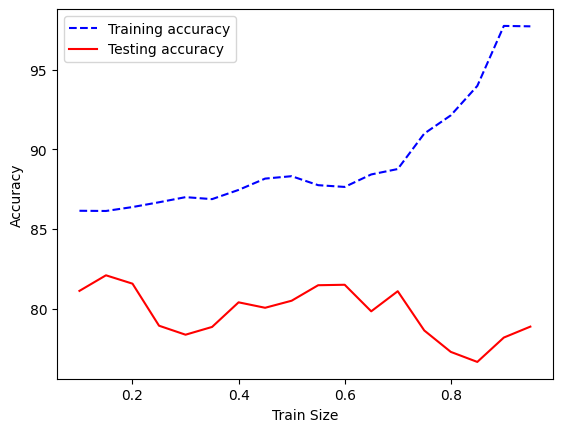

In [128]:
plt.plot(sizes, train_accuracy, color='blue', linestyle='--', label='Training accuracy')
plt.plot(sizes, test_accuracy, color='red', linestyle='-', label='Testing accuracy')
plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.6, random_state=42)

In [130]:
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test_submission)

In [132]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

#### Prediction score on https://www.kaggle.com/

![Screenshot%202022-08-04%20012726.png](attachment:Screenshot%202022-08-04%20012726.png)